In [1]:
import pandas as pd

# Import `fake_or_real_news.csv` 
df = pd.read_csv("fake_or_real_news.csv")
    
# Inspect shape of `df` 
print(df.shape)

# Print first lines of `df` 
print(df.head())

(6335, 4)
   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


In [2]:
# Set index 
df = df.set_index("Unnamed: 0")

# Print first lines of `df` 
df.head()

title  \
Unnamed: 0                                                      
8476                             You Can Smell Hillary’s Fear   
10294       Watch The Exact Moment Paul Ryan Committed Pol...   
3608              Kerry to go to Paris in gesture of sympathy   
10142       Bernie supporters on Twitter erupt in anger ag...   
875          The Battle of New York: Why This Primary Matters   

                                                         text label  
Unnamed: 0                                                           
8476        Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
10294       Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
3608        U.S. Secretary of State John F. Kerry said Mon...  REAL  
10142       — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
875         It's primary day in New York and front-runners...  REAL

In [3]:
# Set `y` 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
y = df.label 

# Drop the `label` column
df.drop("label", axis=1)

# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [4]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

In [5]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [6]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[900:910])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']
['2s', '2x', '2yiugiyosv', '2yxlvcf03qflflgzzfn7fcv5jw', '2zksz3xesc7mmpgrzanh4pk1dlr', '30', '300', '3000', '3001', '300k']


In [7]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [8]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [9]:
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

set()


In [10]:
print(count_df.equals(tfidf_df))

False


In [11]:
count_df.head()

00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...    \
0   0    0     0         0       0      0     0       0      0      0  ...     
1   0    0     0         0       0      0     0       0      0      0  ...     
2   0    0     0         0       0      0     0       0      0      0  ...     
3   0    0     0         0       0      0     0       0      0      0  ...     
4   0    0     0         0       0      0     0       0      0      0  ...     

   حلب  عربي  عن  لم  ما  محاولات  من  هذا  والمرضى  ยงade  
0    0     0   0   0   0        0   0    0        0      0  
1    0     0   0   0   0        0   0    0        0      0  
2    0     0   0   0   0        0   0    0        0      0  
3    0     0   0   0   0        0   0    0        0      0  
4    0     0   0   0   0        0   0    0        0      0  

[5 rows x 56922 columns]

In [12]:
tfidf_df.head()

00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...    \
0  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    0.0    0.0  ...     
1  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    0.0    0.0  ...     
2  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    0.0    0.0  ...     
3  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    0.0    0.0  ...     
4  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    0.0    0.0  ...     

   حلب  عربي   عن   لم   ما  محاولات   من  هذا  والمرضى  ยงade  
0  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
1  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
2  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
3  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
4  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  

[5 rows x 56922 columns]

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools

In [15]:
clf = MultinomialNB() 

accuracy:   0.857
Confusion matrix, without normalization


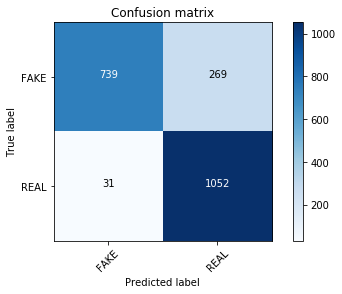

In [16]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [17]:
clf = MultinomialNB() 

accuracy:   0.893
Confusion matrix, without normalization


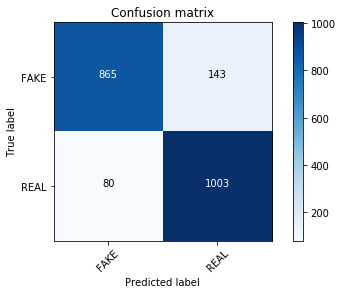

In [18]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [19]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [20]:
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.935
Confusion matrix, without normalization


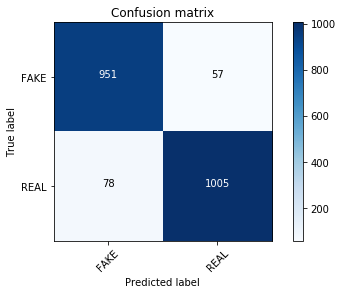

In [21]:
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [22]:
clf = MultinomialNB(alpha=0.1)

In [23]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

C:\Users\User\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.88140
Alpha: 0.10 Score: 0.89766
Alpha: 0.20 Score: 0.89383
Alpha: 0.30 Score: 0.89000
Alpha: 0.40 Score: 0.88570
Alpha: 0.50 Score: 0.88427
Alpha: 0.60 Score: 0.87470
Alpha: 0.70 Score: 0.87040
Alpha: 0.80 Score: 0.86609
Alpha: 0.90 Score: 0.85892


In [24]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

FAKE -5.04959051516 2016
FAKE -4.23725247808 hillary
FAKE -4.10408214487 october
FAKE -3.04379682563 article
FAKE -3.00753304171 share
FAKE -2.75297549474 november
FAKE -2.44725174815 email
FAKE -2.41613598347 print
FAKE -2.28439319578 oct
FAKE -2.25756302661 advertisement
FAKE -2.23743472776 source
FAKE -2.18837993885 podesta
FAKE -2.16756031012 war
FAKE -2.09253857716 mosul
FAKE -1.97834491007 wikileaks
FAKE -1.95324731254 election
FAKE -1.88906431794 nov
FAKE -1.87545189512 com
FAKE -1.84708720273 establishment
FAKE -1.8038642548 corporate
FAKE -1.79506669146 26
FAKE -1.74457904233 jewish
FAKE -1.71256897106 dakota
FAKE -1.6977458227 snip
FAKE -1.69463044822 photo
FAKE -1.6904115986 ayotte
FAKE -1.66185342364 donald
FAKE -1.65450062236 healthcare
FAKE -1.58454587255 fbi
FAKE -1.58327375083 pipeline

REAL 4.77058796338 said
REAL 2.82466920402 says
REAL 2.52234696428 cruz
REAL 2.51912290502 islamic
REAL 2.41040355821 tuesday
REAL 2.40082303072 gop
REAL 2.38046352042 marriage
REAL 2.30

In [25]:
feature_names = tfidf_vectorizer.get_feature_names()

In [26]:
### Most real
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-6.2573612147015822, 'trump'),
 (-6.4944530943126777, 'said'),
 (-6.6539784739838845, 'clinton'),
 (-7.0379446628670728, 'obama'),
 (-7.1465399833812278, 'sanders'),
 (-7.2153760086475112, 'president'),
 (-7.2665628057416169, 'campaign'),
 (-7.2875931446681514, 'republican'),
 (-7.3411184585990643, 'state'),
 (-7.3413571102479054, 'cruz'),
 (-7.3783124419854254, 'party'),
 (-7.4468806724578904, 'new'),
 (-7.4762888011545883, 'people'),
 (-7.547225599514773, 'percent'),
 (-7.5553074094582335, 'bush'),
 (-7.5801506339098932, 'republicans'),
 (-7.5855405012652435, 'house'),
 (-7.6344781725203141, 'voters'),
 (-7.6484824436952987, 'rubio'),
 (-7.6734836186463795, 'states')]

In [27]:
### Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-11.349866225220305, '0000'),
 (-11.349866225220305, '000035'),
 (-11.349866225220305, '0001'),
 (-11.349866225220305, '0001pt'),
 (-11.349866225220305, '000km'),
 (-11.349866225220305, '0011'),
 (-11.349866225220305, '006s'),
 (-11.349866225220305, '007'),
 (-11.349866225220305, '007s'),
 (-11.349866225220305, '008s'),
 (-11.349866225220305, '0099'),
 (-11.349866225220305, '00am'),
 (-11.349866225220305, '00p'),
 (-11.349866225220305, '00pm'),
 (-11.349866225220305, '014'),
 (-11.349866225220305, '015'),
 (-11.349866225220305, '018'),
 (-11.349866225220305, '01am'),
 (-11.349866225220305, '020'),
 (-11.349866225220305, '023')]

In [28]:
tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))

In [29]:
print(tokens_with_weights)

[('00', -10.857116998506546), ('000', -8.4928170585317773), ('0000', -11.349866225220305), ('00000031', -11.281648103237613), ('000035', -11.349866225220305), ('00006', -11.26030410950723), ('0001', -11.349866225220305), ('0001pt', -11.349866225220305), ('000ft', -10.997423118951112), ('000km', -11.349866225220305), ('001', -11.150294151197263), ('0011', -11.349866225220305), ('002', -11.228506379006314), ('003', -11.172466924188384), ('004', -11.164091627418959), ('006', -11.321856249673262), ('006s', -11.349866225220305), ('007', -11.349866225220305), ('007s', -11.349866225220305), ('008', -11.244951152773748), ('008s', -11.349866225220305), ('009', -11.264895105758017), ('0099', -11.349866225220305), ('00am', -11.349866225220305), ('00p', -11.349866225220305), ('00pm', -11.349866225220305), ('01', -11.233784603690763), ('010', -11.304499173299146), ('013', -11.290063381385576), ('014', -11.349866225220305), ('015', -11.349866225220305), ('016', -11.295327052636898), ('018', -11.3498

In [30]:
from sklearn.feature_extraction.text import HashingVectorizer
hash_vectorizer = HashingVectorizer(stop_words='english', non_negative=True)
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

C:\Users\User\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\User\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\User\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


In [31]:
clf = MultinomialNB(alpha=.01)

accuracy:   0.902
Confusion matrix, without normalization


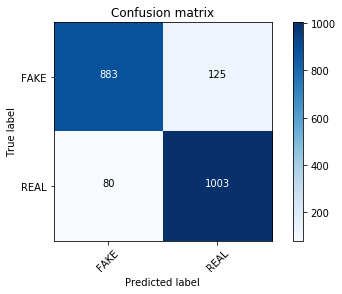

In [32]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [33]:
clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.922
Confusion matrix, without normalization


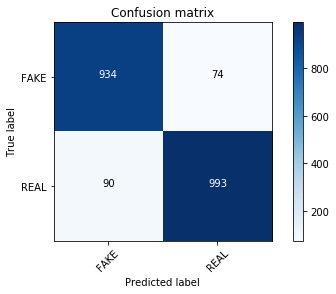

In [34]:
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [44]:
f.type.value_counts()

bs            11492
bias            443
conspiracy      430
hate            246
satire          146
state           121
junksci         102
fake             19
Name: type, dtype: int64

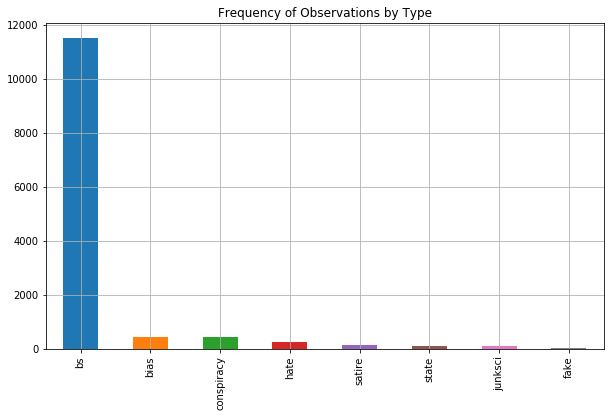

In [47]:
plt.figure(figsize=(10,6))
f.type.value_counts().plot(kind='bar',title = 'Frequency of Observations by Type', grid = True)
plt.show()

In [48]:
len(f.language.unique())

16

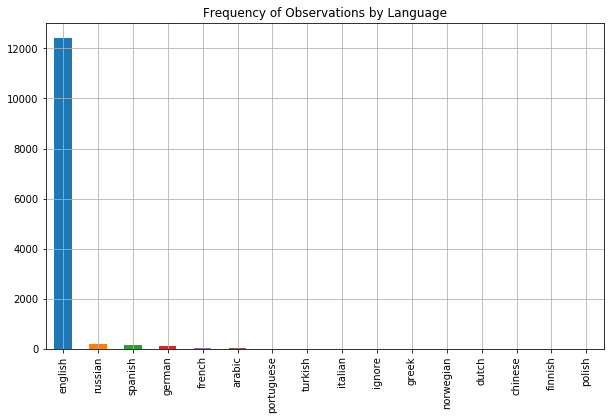

In [51]:
plt.figure(figsize=(10,6))
f.language.value_counts().plot(kind='bar',title = 'Frequency of Observations by Language', grid = True)
plt.show()

In [52]:
l = []
for i in range(len(f.text)):
    l.append(len(str(f.text[i])))
l = pd.DataFrame(l)
f['textlen'] = l

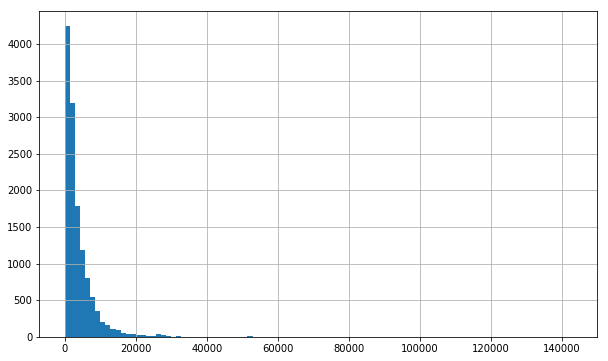

In [55]:
plt.figure(figsize=(10,6))
f.textlen.hist(bins = 100)
plt.show()

In [57]:
#f = f[(f.type == 'bs')|(f.type == 'fake')]
f = f[f.language == 'english']
f = f[(f.textlen > 500)&(f.textlen < 12000)]
f = f[['site_url', 'title', 'text']]
f.reset_index(drop = 'index', inplace=True)
f.rename(columns = {'site_url':'url'}, inplace=True)
print(f.shape)
f.head()

(9940, 3)


url                                              title  \
0  100percentfedup.com  Muslims BUSTED: They Stole Millions In Gov’t B...   
1  100percentfedup.com  Re: Why Did Attorney General Loretta Lynch Ple...   
2  100percentfedup.com  BREAKING: Weiner Cooperating With FBI On Hilla...   
3  100percentfedup.com  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...   
4  100percentfedup.com  Hillary Goes Absolutely Berserk On Protester A...   

                                                text  
0  Print They should pay all the back all the mon...  
1  Why Did Attorney General Loretta Lynch Plead T...  
2  Red State : \nFox News Sunday reported this mo...  
3  Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...  
4  Print Hillary goes absolutely berserk! She exp...

In [58]:
f.url.value_counts()[:200].sum()

9900

In [59]:
f['label'] = 'FAKE'

In [60]:
f.head(2)

url                                              title  \
0  100percentfedup.com  Muslims BUSTED: They Stole Millions In Gov’t B...   
1  100percentfedup.com  Re: Why Did Attorney General Loretta Lynch Ple...   

                                                text label  
0  Print They should pay all the back all the mon...  FAKE  
1  Why Did Attorney General Loretta Lynch Plead T...  FAKE

In [61]:
f['wing'] = '0-unknown'
f['conspiracy'] = 0
f['satire'] = 0

In [62]:
f.head(1)

url                                              title  \
0  100percentfedup.com  Muslims BUSTED: They Stole Millions In Gov’t B...   

                                                text label       wing  \
0  Print They should pay all the back all the mon...  FAKE  0-unknown   

   conspiracy  satire  
0           0       0

In [63]:
# below I have checked 215 news resources at https://mediabiasfactcheck.com to identify the political affiliation
# for each of the news aggregator or the news agency

f.loc[f.url.str.contains('consortiumnews|usatoday|politifact|sctimes|timesofsandiego'),'wing'] = '4-center'
f.loc[f.url.str.contains('presstv|mintpressnews|latimes|chicagotribune|bustle|natmonitor|politico'),'wing'] = '3-center left'
f.loc[f.url.str.contains('antiwar|russia-insider|sputniknews|strategic-culture|postbulletin|hpenews|ustfactsdaily'),'wing'] = '5-center right'
f.loc[f.url.str.contains('politicususa|opednews|liberalamerica|truthdig|counterpunch|blackagendareport|guardianlv|ahtribune|intrepidreport|wakingtimes|addictinginfo|activistpost|other98|countercurrents|huffingtonpost|rabble|cnn'),'wing'] = '2-left'
f.loc[f.url.str.contains('naturalnews|ijr|wearechange|awdnews|twitchy|thenewamerican|amtvmedia|abovetopsecret|nowtheendbegins|thecommonsenseshow|fromthetrenchesworldreport|nakedcapitalism|prisonplanet|investmentwatchblog|ronpaulinst|thecontroversialfiles|gulagbound|rt|thedailybell|corbettreport|zerohedge|whatreally|wikileaks|newstarg|regated|southfront'),'wing'] = '6-right'
f.loc[f.url.str.contains('occupydemocrats|ifyouonlynews|pravdareport|usuncut|newcenturytimes|trueactivist|dailynewsbin'),'wing'] = '1-extreme left'
f.loc[f.url.str.contains('madworldnews|thefederalistpapers|conservativetribune|libertyunyielding|truthfeed|freedomoutpost|frontpagemag|dccl|othesline|wnd|ihavethetruth|amren|barenakedislam|returnofkings|trunews|jewsnews|shtfplan|lewrockwell|dailystormer|libertynews|endingthefield|dailywire|vdare|100percentfedup|21stcenturywire|westernjournalism|redflagnews|libertywritersnews|conservativedailypost|departed|breitbart|donaldtrumpnews.co|bipartisanreport|americanlookout|spinzon|usapoliticsnow|usanewsflash|hangthebankers|toprightnews|usasupreme|americasfreedomfighters|viralliberty'),'wing'] = '7-extreme right'

In [64]:
# below, similarly to the cell above the code assigns whether the news agency or agregator 
# publishes conspiracy/pseudoscience news / information

f.loc[f.url.str.contains('yournewswire|trunews|naturalnews|infowars|eutimes|truthfeed|topinfopost|thedailysheeple|jewsnews|wearechange|awdnews|worldtruth|govtslaves|thetruthseeker.co|amtvmedia|sott|abovetopsecret.com|collective-evolution.com|shtfplan.com|theeventchronicle.com|thefreethoughtproject.com|humansarefree.com|veteranstoday.com|lewrockwell.com|nowtheendbegins.com|thecommonsenseshow.com|themindunleashed.comfromthetrenchesworldreport.com|intellihub.com|realfarmacy.com|greanvillepost.com|dailystormer.com|disclose.tv|whydontyoutrythis.com|prisonplanet.com|investmentwatchblog.com|thecontroversialfiles.net|godlikeproductions.com|anonhq.com|abeldanger.net|wakingtimes.com |gulagbound.com|endingthefed.com|healthimpactnews.com|truthbroadcastnetwork.com|21stcenturywire.com|corbettreport.com|undergroundhealth.com|zerohedge.com|geoengineeringwatch.org|conservativedailypost.com|pakalertpress.com|whatreallyhappened.com|coasttocoastam.com|trueactivist.com|activistpost.com|theantimedia.org|usapoliticsnow.com|newstarget.com|theearthchild.co.za|anonews.co|southfront.org|americasfreedomfighters.com|davidwolfe.com|vigilantcitizen.com'),'conspiracy'] = 1

In [65]:
f.loc[f.url.str.contains('waterfordwhispersnews|theonion|thedailymash|thespoof|clickhole|newsthump|newsbiscuit|theunrealtimes|dailysquib|adobochronicles|gomerblog|thelastlineofdefense|satirewire|reductress'),'satire'] = 1

In [66]:
f.wing.value_counts()

0-unknown          4723
7-extreme right    2037
6-right            1775
2-left              679
5-center right      273
1-extreme left      249
3-center left       204
Name: wing, dtype: int64

In [67]:
f.head()

url                                              title  \
0  100percentfedup.com  Muslims BUSTED: They Stole Millions In Gov’t B...   
1  100percentfedup.com  Re: Why Did Attorney General Loretta Lynch Ple...   
2  100percentfedup.com  BREAKING: Weiner Cooperating With FBI On Hilla...   
3  100percentfedup.com  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...   
4  100percentfedup.com  Hillary Goes Absolutely Berserk On Protester A...   

                                                text label             wing  \
0  Print They should pay all the back all the mon...  FAKE  7-extreme right   
1  Why Did Attorney General Loretta Lynch Plead T...  FAKE  7-extreme right   
2  Red State : \nFox News Sunday reported this mo...  FAKE  7-extreme right   
3  Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...  FAKE  7-extreme right   
4  Print Hillary goes absolutely berserk! She exp...  FAKE  7-extreme right   

   conspiracy  satire  
0           0       0  
1           0       0  
2           0       0  
3           0       0  
4           0       0

In [68]:
# I could only identify about 140 resources by their political wing affiliation. The rest 60 remained unknown. 
# The great part of those are satirical resource. So I decided to keep them. 

f.wing.value_counts().plot(kind = 'bar')
f.wing.value_counts()

0-unknown          4723
7-extreme right    2037
6-right            1775
2-left              679
5-center right      273
1-extreme left      249
3-center left       204
Name: wing, dtype: int64

In [71]:
z_z = pd.DataFrame()
z_ = []
for i in sorted(f.wing.unique()):
    cvec = CountVectorizer(stop_words='english')
    cvec.fit(f[f.wing == i].text)
    cvecdata = cvec.transform(f[f.wing == i].text)
    df = pd.DataFrame(cvecdata.todense(),
                     columns = cvec.get_feature_names())
    z_ = pd.DataFrame(df.sum())
    z_.columns = ["sums"]
    z_ = pd.DataFrame(z_.sums.sort_values(ascending=False)[:100]/float(z_.sum())*100)
    z_z = pd.concat([z_z,z_], axis = 1)
z_z.columns = f.wing.unique()
z_z.dropna(inplace = True)
print(z_z.shape)

(29, 7)


In [73]:
z_z = z_z[sorted(f.wing.unique())]
z_z['mean'] = z_z.mean(axis=1)
z_z = z_z.sort_values(by = "mean", ascending=False)[:10]
z_z.to_csv("fake_word_freq.csv")
z_z

0-unknown  1-extreme left    2-left  3-center left  5-center right  \
trump       2.383475        0.729491  0.345683       0.896126        0.296505   
clinton     0.720949        0.706431  0.626210       1.005061        0.395339   
said        0.463840        0.407162  0.892259       0.507625        0.413436   
people      0.444730        0.489806  0.508570       0.455381        0.324345   
hillary     0.531591        0.424330  0.231662       0.791822        0.224118   
2016        0.436044        0.366934  0.571915       0.330142        0.199062   
election    0.644511        0.264764  0.244331       0.375532        0.136420   
new         0.307489        0.309200  0.298626       0.308095        0.328522   
president   0.408248        0.297755  0.238901       0.294756        0.300681   
just        0.491635        0.264259  0.166507       0.354967        0.158693   

            6-right  7-extreme right      mean  
trump      0.924053         0.531415  0.872392  
clinton    0.582718         0.534787  0.653071  
said       0.293532         0.381961  0.479974  
people     0.532150         0.444233  0.457031  
hillary    0.297878         0.339850  0.405893  
2016       0.235458         0.253769  0.341903  
election   0.323557         0.271453  0.322938  
new        0.325137         0.317762  0.313547  
president  0.271804         0.222736  0.290697  
just       0.258371         0.330973  0.289344

In [74]:
df.head()

00  000  000km  001  007  00o  01  015  018  02    ...     ź300  ź4  ź50  \
0   0    0      0    0    0    0   0    0    0   0    ...        0   0    0   
1   0    0      0    0    0    0   0    0    0   0    ...        0   0    0   
2   0    0      0    0    0    0   0    0    0   0    ...        0   0    0   
3   0    0      0    0    0    0   0    0    0   0    ...        0   0    0   
4   0    0      0    0    0    0   0    0    0   0    ...        0   0    0   

   за  эa  эin  эthe  إنفوجرافيك  السعودية  ノhillbro  
0   0   0    0     0           0         0         0  
1   0   0    0     0           0         0         0  
2   0   0    0     0           0         0         0  
3   0   0    0     0           0         0         0  
4   0   0    0     0           0         0         0  

[5 rows x 33238 columns]

In [75]:
f.groupby('wing').sum()

conspiracy  satire
wing                               
0-unknown              1905     741
1-extreme left            9       0
2-left                    8       0
3-center left             0       0
5-center right            0       0
6-right                 901       0
7-extreme right         567       0

In [76]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(f[f.satire == 1].text)
cvecdata = cvec.transform(f[f.satire == 1].text)
df = pd.DataFrame(cvecdata.todense(),
                 columns = cvec.get_feature_names())
z_ = pd.DataFrame(df.sum())
z_.columns = ["percent"]
z_ = pd.DataFrame(z_.percent.sort_values(ascending=False)[:100]/float(z_.sum())*100)
z_.head(10)

percent
trump     0.769656
just      0.656520
said      0.539255
like      0.451719
2016      0.442635
people    0.425293
time      0.407125
new       0.403822
election  0.346015
day       0.331150

In [77]:
# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(f.text)
y = f.label

In [78]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


In [79]:
pred = clf.predict(tfidf_test)

ValueError: X has 56922 features per sample; expecting 1048576